Fax Tutorial
============

Hello friend.
Welcome to the basic tutorial on how to simulate waveforms with the lastest fax version in strax.
Here we'll just demonstrate the basic functionality. For more indepth analysis stuff, checkout the straxen tutorials for more detailed thing.

In [1]:
import numpy as np
import strax
import straxen
import wfsim

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from multihist import Histdd, Hist1d
from scipy import stats

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


/home/joran/.conda/envs/strax3.6/lib/python3.6/site-packages/datashader-0.7.0-py3.6.egg/datashader/transfer_functions.py:21: FutureWarning: xarray subclass Image should explicitly define __slots__
  class Image(xr.DataArray):


Setting everything up
=================

First we need to define the right context. The thing which differs now is where to get the plugin to provide raw records. By default this is the DAQ Reader. Now we do not want this so we register wfsim.RawRecordsFromFax. I think it is self explanatory where this plugin tells strax to get raw records from

In [2]:
st = strax.Context(
    register=wfsim.RawRecordsFromFax,
#     config=dict((detector="XENONnT"))
    **straxen.contexts.common_opts)

Now we need to define a run id. What you give it doesn't really matter, since strax will look for data and make new if it doesn't find anything. And this is what you want.
Strax will use the run id to get the electron lifetime and pmt gains from a database, and returns placeholders if the run doesn't exist. (Currently the electron lifetime doesn't return a placeholder, this should be fixed)

In [3]:
# Just some id from post-SR1, so the corrections work
run_id = '180215_1029'

Strax has a build in timeout which we need to modify. When simulating stuff we'll probably take more time then is allowed by the timeout so we need to increase it

In [4]:
strax.Mailbox.DEFAULT_TIMEOUT=1000

Defining instructions
===============

The last detail before we can start. To give fax instructions you now have two possibilities. Either read in a MC output file and let a super basic nestpy convert it to instructions, or have them be random generated.
First I'll show how to read from a file

In [5]:
# file = '/Users/petergaemers/Desktop/python/strax_auxiliary_files/Xenon1T_WholeLXe_Pb212_00008_g4mc_G4.root'
# st.set_config(dict(fax_file= file))

In [6]:
# %load $file

The alternative is to let fax make some random things for you. This will call the function strax_interface.rand_instructions in case you want to change it up a little bit.
We need to tell fax 3 parameters. nchunk tells strax over how many files to smear out the data. Currently it is highy advised to set this to 1 to avoid crashes. event_rate determains how many events per second to make,  so this will determaine, approximatly, the spacing between events. Finally chunk_size defines the length of a chunk in seconds.
The total number of events generated is the product of all three numbers

In [7]:
st.set_config(dict(fax_file=None))
st.set_config(dict(nchunk=1, event_rate = 1, chunk_size = 500))

Getting down to bussiness
---

Now we have acces to all the normal strax data types, and another one called 'truth' which holds the simulation instructions. Calling it follows the normal strax convention.

Removing data in ./strax_data/180215_1029-truth-lbl5kskcci to overwrite
Removing data in ./strax_data/180215_1029-raw_records-lbl5kskcci to overwrite
Removing data in ./strax_data/180215_1029-pulse_counts-oon6c7n3w6 to overwrite
Removing data in ./strax_data/180215_1029-veto_regions-oon6c7n3w6 to overwrite
Removing data in ./strax_data/180215_1029-records-oon6c7n3w6 to overwrite
Removing data in ./strax_data/180215_1029-diagnostic_records-oon6c7n3w6 to overwrite
Removing data in ./strax_data/180215_1029-aqmon_records-oon6c7n3w6 to overwrite



Simulating Raw Records:  22%|██▏       | 216/1000 [00:21<01:16, 10.21it/s]


Simulating Raw Records:  45%|████▌     | 452/1000 [00:43<00:48, 11.37it/s]


Simulating Raw Records:  69%|██████▉   | 691/1000 [01:05<00:39,  7.78it/s]


Simulating Raw Records:  94%|█████████▎| 935/1000 [01:26<00:05, 12.15it/s]


Simulating Raw Records: 100%|██████████| 1000/1000 [01:31<00:00, 10.88it/s]


Source finished!


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
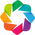

:Layout
   .DynamicMap.I   :DynamicMap   []
      :Overlay
         .PeakSumWaveform.I    :Curve   [time]   (amplitude)
         .PeakSumWaveform.II   :Curve   [time]   (amplitude)
         .PeakSumWaveform.III  :Curve   [time]   (amplitude)
         .PeakSumWaveform.IV   :Curve   [time]   (amplitude)
         .PeakSumWaveform.V    :Curve   [time]   (amplitude)
         .PeakSumWaveform.VI   :Curve   [time]   (amplitude)
         .PeakSumWaveform.VII  :Curve   [time]   (amplitude)
         .PeakSumWaveform.VIII :Curve   [time]   (amplitude)
         .PeakSumWaveform.IX   :Curve   [time]   (amplitude)
         .PeakSumWaveform.X    :Curve   [time]   (amplitude)
   .DynamicMap.II  :DynamicMap   []
      :Points   [x,y]   (area,i)
   .DynamicMap.III :DynamicMap   []
      :RGB   [time,channel]   (R,G,B,A)
   .DynamicMap.IV  :DynamicMap   []
      :Points   [x,y]   (area,i)

In [8]:
# Remove any previously simulated data, if such exists
# !rm -r strax_data

records = st.get_array(run_id,'records')
peaks = st.get_array(run_id, ['peaks','peak_classification'])
data = st.get_df(run_id, 'event_info')

truth = st.get_df(run_id, 'truth')
st.waveform_display(run_id)

In [19]:
!wget https://raw.githubusercontent.com/XENON1T/XeAnalysisScripts/master/PeakFinderTest/match_peaks.py?token=AFKDK2RGHIU4JMMI4RQ2P7S5TBJVO

--2019-09-28 10:25:32--  https://raw.githubusercontent.com/XENON1T/XeAnalysisScripts/master/PeakFinderTest/match_peaks.py?token=AFKDK2RGHIU4JMMI4RQ2P7S5TBJVO
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.240.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.240.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12373 (12K) [text/plain]
Saving to: ‘match_peaks.py?token=AFKDK2RGHIU4JMMI4RQ2P7S5TBJVO’

match_peaks.py?toke 100%[===================>]  12.08K  --.-KB/s    in 0.001s  

2019-09-28 10:25:33 (12.7 MB/s) - ‘match_peaks.py?token=AFKDK2RGHIU4JMMI4RQ2P7S5TBJVO’ saved [12373/12373]



In [9]:
truth.head()

,event_number,type,t,x,y,z,amp,recoil,n_photon,n_electron,t_first_photon,t_last_photon,t_mean_photon,t_sigma_photon,t_first_electron,t_last_electron,t_mean_electron,t_sigma_electron
0,0,s1,2697138047,-44.069115,11.186975,-27.127760,100,er,8.0,0.0,2.697138e+09,2.697138e+09,2.697138e+09,30.755914,NaN,NaN,NaN,NaN
1,0,s2,2697138047,-44.069115,11.186975,-27.127760,182,er,2434.0,125.0,2.697341e+09,2.697346e+09,2.697343e+09,857.483140,2.697341e+09,2.697345e+09,2.697343e+09,854.691868
2,0,s1,3044147513,17.094469,-30.969709,-74.062698,279,er,42.0,0.0,3.044148e+09,3.044148e+09,3.044148e+09,26.767503,NaN,NaN,NaN,NaN
3,0,s2,3044147513,17.094469,-30.969709,-74.062698,96,er,930.0,40.0,3.044702e+09,3.044708e+09,3.044704e+09,1150.451797,3.044701e+09,3.044707e+09,3.044704e+09,1154.427504
4,0,s1,4784465820,22.274834,-19.373018,-37.095016,33,er,5.0,0.0,4.784466e+09,4.784466e+09,4.784466e+09,17.190091,NaN,NaN,NaN,NaN


Now it is time to make pretty plots and see if what we makes actually makes any sense

/home/joran/.conda/envs/strax3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  This is separate from the ipykernel package so we can avoid doing imports until


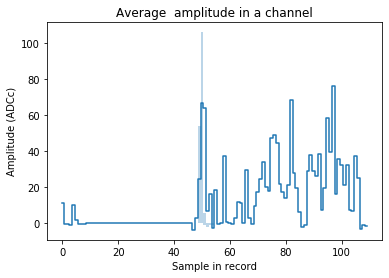

In [10]:
r = records[records['channel']==10]
ns = np.arange(len(records['data'][0]))
plt.plot(ns, r['data'][:10].mean(axis=0), linestyle='steps-mid')
plt.fill_between(
    ns,
    np.percentile(r['data'], 25, axis=0),
    np.percentile(r['data'], 75, axis=0), 
    step='mid', alpha=0.3, linewidth=0)
plt.xlabel("Sample in record")
plt.ylabel("Amplitude (ADCc)")
plt.title('Average  amplitude in a channel')
plt.show()

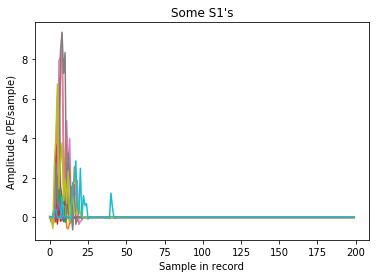

In [11]:
plt.plot(peaks[peaks['type']==1]['data'][:10].T)
plt.xlabel("Sample in record")
plt.ylabel("Amplitude (PE/sample)")
plt.title("Some S1's")
plt.show()

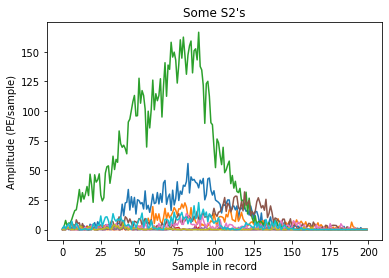

In [12]:
plt.plot(peaks[peaks['type']==2]['data'][:10].T)
plt.xlabel("Sample in record")
plt.ylabel("Amplitude (PE/sample)")
plt.title("Some S2's")
plt.show()

(Since the instructions are generated randomly I do not know what your results look like, so I make some assumptions):

Wauw, they really look amazing, right? For further analysis, we'd like to look at if the created peaks more or less look like the instructions

In [13]:
print(f"The number of found events is {len(data)}, while the number of events in the instruction was {len(truth)/2} ")

The number of found events is 463, while the number of events in the instruction was 500.0 


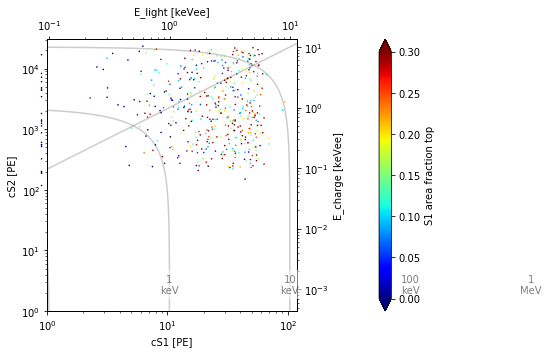

In [14]:
st.event_scatter(run_id)

In [15]:
truth = st.get_df(run_id, 'truth')
data = st.get_df(run_id, 'event_info')

truth = truth[(truth['type'] == 's1') & (truth['n_photon'] > 0)]
truth.sort_values(by='t_first_photon', inplace=True)
timing_grid = truth['t_first_photon']

truth['merge_index'] = np.digitize(truth['t'], timing_grid)
data['merge_index'] = np.digitize(data['time'], timing_grid)

truth.drop('event_number', axis=1, inplace=True)
data = data.merge(truth, how='outer', left_on='merge_index', right_on='merge_index')

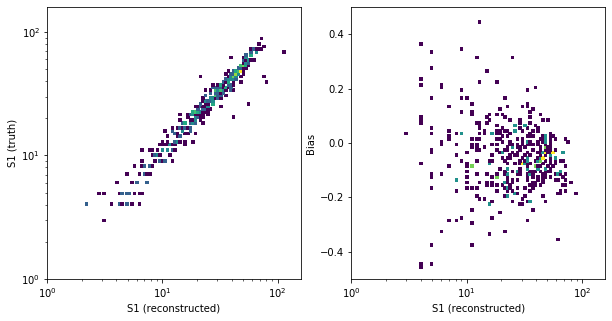

In [16]:
plt.rcParams['figure.figsize'] = (10, 5)
fig = plt.figure()

ax = fig.add_subplot(121)
mh = Histdd(data.s1_area, data.n_photon,
            bins=[np.logspace(0, 2.2, 101), np.logspace(0, 2.2, 101)])
plt.pcolormesh(mh.bin_edges[0], mh.bin_edges[1], mh.histogram.T, norm=LogNorm())
plt.xscale('log'); plt.yscale('log')
plt.xlabel('S1 (reconstructed)')
plt.ylabel('S1 (truth)')

ax = fig.add_subplot(122)
mh = Histdd(data.n_photon, (data.s1_area-data.n_photon)/data.n_photon, 
            bins=[np.logspace(0, 2.2, 101), np.linspace(-0.5, 0.5, 101)])
plt.pcolormesh(mh.bin_edges[0], mh.bin_edges[1], mh.histogram.T, norm=LogNorm())
plt.xscale('log')
plt.xlabel('S1 (reconstructed)')
plt.ylabel('Bias')

plt.show()

In [17]:
truth = st.get_df(run_id, 'truth')
data = st.get_df(run_id, 'event_info')

truth = truth[(truth['type'] == 's2') & (truth['n_photon'] > 0)]
truth.sort_values(by='t_first_photon', inplace=True)
timing_grid = truth['t_first_photon']

truth['merge_index'] = np.digitize(truth['t'], timing_grid)
data['merge_index'] = np.digitize(data['time'], timing_grid)
truth.drop('event_number', axis=1, inplace=True)
data = data.merge(truth, how='outer', left_on='merge_index', right_on='merge_index')

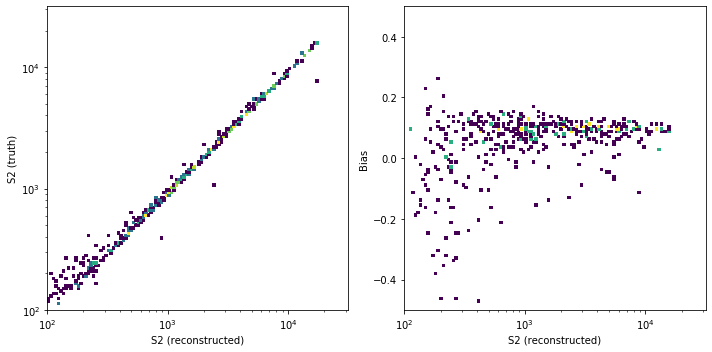

In [18]:
plt.rcParams['figure.figsize'] = (10, 5)
fig = plt.figure()

ax = fig.add_subplot(121)
mh = Histdd(data.s2_area, data.n_photon,
            bins=[np.logspace(2, 4.5, 121), np.logspace(2, 4.5, 121)])
plt.pcolormesh(mh.bin_edges[0], mh.bin_edges[1], mh.histogram.T, norm=LogNorm())
plt.xscale('log'); plt.yscale('log')
plt.xlabel('S2 (reconstructed)')
plt.ylabel('S2 (truth)')

ax = fig.add_subplot(122)
mh = Histdd(data.n_photon, (data.s2_area-data.n_photon)/data.n_photon, 
            bins=[np.logspace(2, 4.5, 121), np.linspace(-0.5, 0.5, 121)])
plt.pcolormesh(mh.bin_edges[0], mh.bin_edges[1], mh.histogram.T, norm=LogNorm())
plt.xscale('log')
plt.xlabel('S2 (reconstructed)')
plt.ylabel('Bias')

plt.tight_layout()
plt.show()